#                                             CVS

### Data collection

In [310]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [311]:
tickers = ['CVS']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [312]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6867 entries, 1995-01-03 to 2022-04-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CVS     6867 non-null   float64
dtypes: float64(1)
memory usage: 107.3 KB


In [313]:
mydata.head()

,CVS
Date,
1995-01-03,4.515669
1995-01-04,4.497676
1995-01-05,4.515669
1995-01-06,4.515669
1995-01-09,4.479685


In [314]:
mydata.tail()

,CVS
Date,
2022-04-04,100.000000
2022-04-05,99.459999
2022-04-06,102.059998
2022-04-07,103.610001
2022-04-08,106.610001


### Normalization to 100:

In [315]:
mydata.iloc[0]

CVS    4.515669
Name: 1995-01-03 00:00:00, dtype: float64

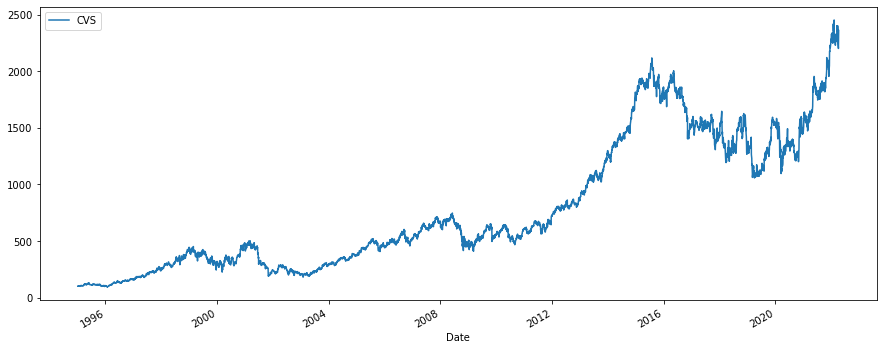

In [316]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

### Find a stock price based on date:

In [317]:
mydata.loc['2019-09-26']

CVS    57.472233
Name: 2019-09-26 00:00:00, dtype: float64

## Calculating the Return of a Portfolio of Securities

In [318]:
returns = (mydata / mydata.shift(1)) - 1
returns.tail()

,CVS
Date,
2022-04-04,-0.010782
2022-04-05,-0.005400
2022-04-06,0.026141
2022-04-07,0.015187
2022-04-08,0.028955


### Porfolio Weights:

In [319]:
weights = np.array([1])

In [320]:
np.dot(returns, weights)

array([        nan, -0.00398446,  0.0040004 , ...,  0.02614115,
        0.01518718,  0.02895473])

***

## Average Annual Returns of the porfolio over past couple decades:

### CVS Stock:

In [321]:
annual_returns = returns.mean() * 250
annual_returns

CVS    0.161483
dtype: float64

### Total porfolio:

In [322]:
np.dot(annual_returns, weights)

0.16148301154334063

In [323]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 3) * 100) + ' %'
print (pfolio_1)

16.1 %


***

## Compare the risk between CVS and S&P500 index

In [324]:
tickers = ['CVS', 'VOO']

data = pd.DataFrame()

for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

In [325]:
returns = np.log(data / data.shift(1))
returns

,CVS,VOO
Date,,
1999-12-31,NaN,NaN
2000-01-03,-0.053110,NaN
2000-01-04,-0.008299,NaN
2000-01-05,0.053541,NaN
2000-01-06,-0.073744,NaN
...,...,...
2022-04-04,-0.010841,0.008443
2022-04-05,-0.005415,-0.012439
2022-04-06,0.025805,-0.010180


### CVS

Daily risk:

In [326]:
returns['CVS'].std()

0.018735882585272305

Annual risk:

In [327]:
returns['CVS'].std() * 250 ** 0.5

0.29624031471472195

### S&P 500

Daily risk:

In [328]:
returns['VOO'].std()

0.010752517939637607

Annual risk:

In [329]:
returns['VOO'].std() * 250 ** 0.5

0.17001223635537868

******

### Volatility:

In [330]:
vols = returns[['CVS', 'VOO']].std() * 250 ** 0.5
vols

CVS    0.296240
VOO    0.170012
dtype: float64

***

# Calculating Porfolio Risk:

## Covariance and Correlation

In [331]:
cov_matrix = returns.cov()
cov_matrix

,CVS,VOO
CVS,0.000351,0.000090
VOO,0.000090,0.000116


In [332]:
cov_matrix_a = returns.cov() * 250
cov_matrix_a

,CVS,VOO
CVS,0.087758,0.022624
VOO,0.022624,0.028904


***

In [333]:
corr_matrix = returns.corr()
corr_matrix

,CVS,VOO
CVS,1.000000,0.562736
VOO,0.562736,1.000000


## Calculating Portfolio Risk

Equal weigthing scheme:

In [334]:
weights = np.array([0.5, 0.5])

Portfolio Variance:

In [335]:
pfolio_var = np.dot(weights.T, np.dot(returns.cov() * 250, weights))
pfolio_var

0.04047749255655236

Portfolio Volatility:

In [336]:
pfolio_vol = (np.dot(weights.T, np.dot(returns.cov() * 250, weights))) ** 0.5
pfolio_vol

0.2011901900107268

In [337]:
print (str(round(pfolio_vol, 3) * 100) + ' %')

20.1 %


***

# The diversifiable and non diversifiable risks of a porfolio

In [338]:
tickers = ['CVS', 'VOO']
sec_data = pd.DataFrame()
for t in tickers:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']
    
sec_data

,CVS,VOO
Date,,
2007-01-03,23.362816,NaN
2007-01-04,23.484034,NaN
2007-01-05,23.612808,NaN
2007-01-08,23.749159,NaN
2007-01-09,23.491602,NaN
...,...,...
2022-04-04,100.000000,419.850006
2022-04-05,99.459999,414.660004
2022-04-06,102.059998,410.459991


In [339]:
sec_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3845 entries, 2007-01-03 to 2022-04-08
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CVS     3845 non-null   float64
 1   VOO     2917 non-null   float64
dtypes: float64(2)
memory usage: 90.1 KB


Then, calculate the diversifiable and the non-diversifiable risk of a portfolio, composed of these two stocks:

a) with weights 0.5 and 0.5;

In [340]:
sec_returns = np.log(sec_data / sec_data.shift(1))
sec_returns

,CVS,VOO
Date,,
2007-01-03,NaN,NaN
2007-01-04,0.005175,NaN
2007-01-05,0.005469,NaN
2007-01-08,0.005758,NaN
2007-01-09,-0.010904,NaN
...,...,...
2022-04-04,-0.010841,0.008443
2022-04-05,-0.005415,-0.012439
2022-04-06,0.025805,-0.010180


### Calculating Portfolio Variance

Weightings scheme:

In [341]:
weights = np.array([0.5, 0.5])

Portfolio Variance:

In [342]:
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))
pfolio_var

0.036278692600385465

### Calculating Diversifiable and Non-Diversifiable Risk of a Portfolio

Diversifiable Risk:

In [343]:
CVS_var_a = sec_returns[['CVS']].var() * 250
CVS_var_a

CVS    0.070963
dtype: float64

In [344]:
VOO_var_a = sec_returns[['VOO']].var() * 250
VOO_var_a

VOO    0.028904
dtype: float64

Calculating Diversifiable Risk:

In [345]:
dr = pfolio_var - (weights[0] ** 2 * CVS_var_a) - (weights[1] ** 2 * VOO_var_a)
dr

CVS   NaN
VOO   NaN
dtype: float64

In [346]:
print (str(round(dr*100, 3)) + ' %')

CVS   NaN
VOO   NaN
dtype: float64 %


Calculating Non-Diversifiable Risk:

In [347]:
n_dr_1 = pfolio_var - dr
n_dr_1

CVS   NaN
VOO   NaN
dtype: float64

In [348]:
print (str(round(n_dr_1*100, 3)) + ' %')

CVS   NaN
VOO   NaN
dtype: float64 %


*****

# Testing different weight combination for a porfolio. 

In [349]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['AAPL','OXY', 'CVS']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [350]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.47638775, 0.51350366, 0.01010859])

Expected Portfolio Return:

In [351]:
np.sum(weights * log_returns.mean()) * 250

0.12486525417292484

Expected Portfolio Variance:

In [352]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.10806523411131291

Expected Portfolio Volatility:

In [353]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.32873277005998797

In [354]:
pf_returns = []
pf_volatilities = []
weights_1 = []
weights_2 = []
weights_3 = []

In [355]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    weights_1.append(weights[0])
    weights_2.append(weights[1])
    weights_3.append(weights[2])
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

In [356]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)
weights_1 = np.array(weights_1)
weights_2 = np.array(weights_2)
weights_3 = np.array(weights_3)


In [357]:
portfolios = pd.DataFrame({'Return' : pf_returns, 'Volatility' : pf_volatilities, 'WMT_weights' : weights_1, 'FB_weights': weights_2, 'BP_weights': weights_3})

In [358]:
portfolios.head()

,Return,Volatility,WMT_weights,FB_weights,BP_weights
0,0.107468,0.225427,0.251922,0.178076,0.570002
1,0.134022,0.299845,0.489377,0.433109,0.077513
2,0.108290,0.339932,0.410373,0.555172,0.034455
3,0.074351,0.273241,0.170347,0.384289,0.445364
4,0.162957,0.216287,0.486670,0.072178,0.441151


In [359]:
portfolios.tail()

,Return,Volatility,WMT_weights,FB_weights,BP_weights
995,0.103638,0.263593,0.304600,0.353698,0.341702
996,0.181556,0.229931,0.601234,0.124340,0.274426
997,0.113106,0.288315,0.380098,0.422231,0.197671
998,0.078997,0.236142,0.115943,0.194470,0.689587
999,0.100365,0.352736,0.385362,0.591115,0.023524


Text(0, 0.5, 'Expected Return')

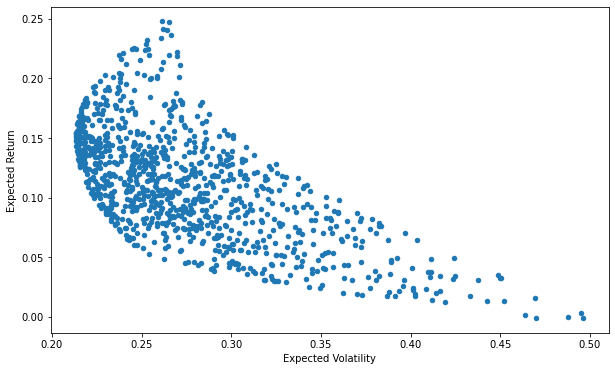

In [360]:
portfolios.plot(x = 'Volatility', y = 'Return', kind = 'scatter', figsize = (10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

*****

# Assess if a stock is defensive or aggressive - Beta Value

In [361]:
import pandas as pd
import numpy as np 
from pandas_datareader import data as wb 
stockvsmarket = ['CVS', '^GSPC']
stock_data = pd.DataFrame()

for i in stockvsmarket:
    stock_data[i] = wb.DataReader(i, data_source = 'yahoo', start = '01-01-2012', end = '12-31-2016')['Adj Close']
    

In [362]:
stock_return = np.log(stock_data/stock_data.shift(1))

In [363]:
cov = stock_return.cov()*250

In [364]:
cov_with_market = cov.iloc[0,1]

In [365]:
market_var = stock_return['^GSPC'].var()*250

In [366]:
stock_beta = cov_with_market / market_var

stock_beta

0.7844119999891436

# Calculated expected return for a stock

In [367]:
expected_future_return = 0.0270 + stock_beta*0.05
expected_future_return

# 0.0270 = 10 years US treasury bond

0.06622059999945717

**Sharpe ratio:**

In [368]:
Sharpe_CVS = (expected_future_return - 0.0185)/(stock_return['CVS'].std()*250**0.5)
Sharpe_CVS

0.2650369544537549

# Monte Carlo- Predicting Gross Profit

In [369]:
import numpy as np 
import matplotlib.pyplot as plt

In [370]:
rev_m = 170
rev_stdev = 20 
iterations = 1000 

In [371]:
rev = np.random.normal(rev_m, rev_stdev, iterations)

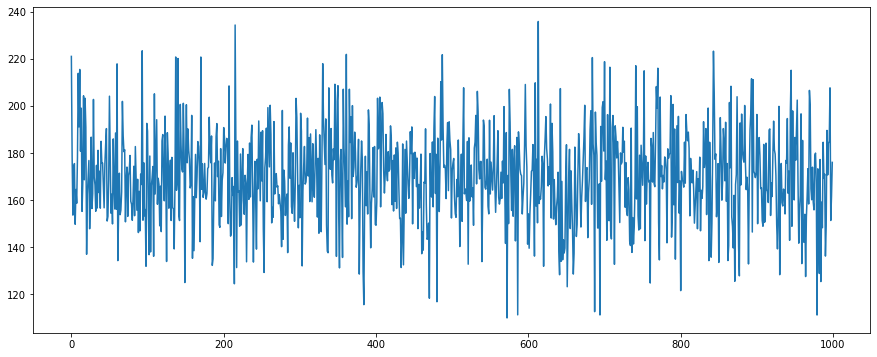

In [372]:
plt.figure(figsize=(15, 6))
plt.plot(rev)
plt.show()

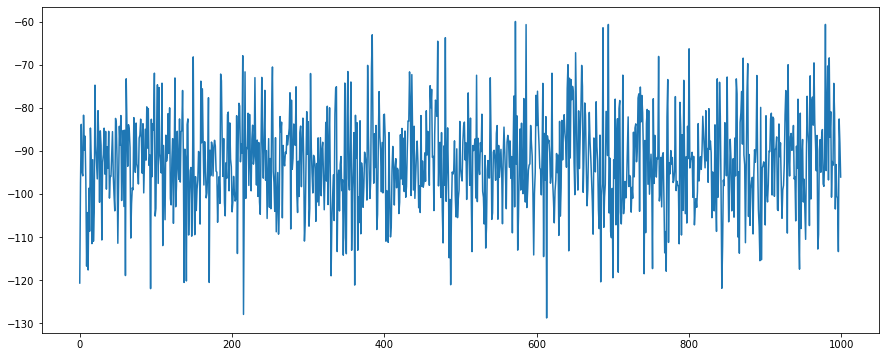

In [373]:
COGS = - (rev * np.random.normal(0.6, 0.1))

plt.figure(figsize =(15, 6))
plt.plot(COGS)
plt.show()


In [374]:
COGS.mean()

-92.70818694999016

In [375]:
COGS.std()

10.920334934814711

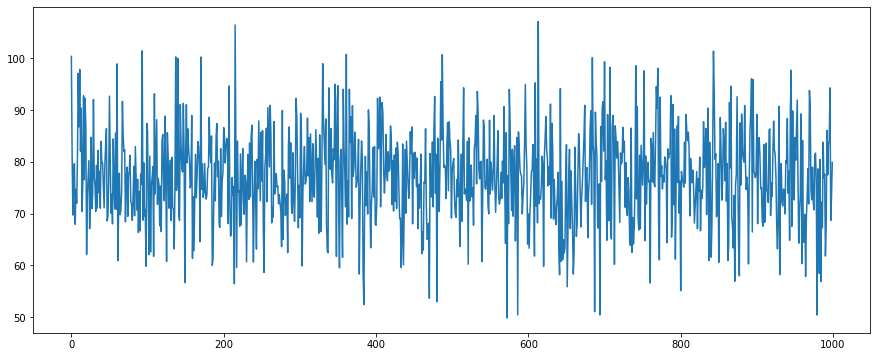

In [376]:
Gross_Profit = rev + COGS
Gross_Profit 

plt.figure(figsize=(15, 6))
plt.plot(Gross_Profit)
plt.show()

In [377]:
max(Gross_Profit)

107.12126911962886

In [378]:
min(Gross_Profit)

49.85389589327846

In [379]:
Gross_Profit.mean()

77.09851145087588

In [380]:
Gross_Profit.std()

9.081631253056246

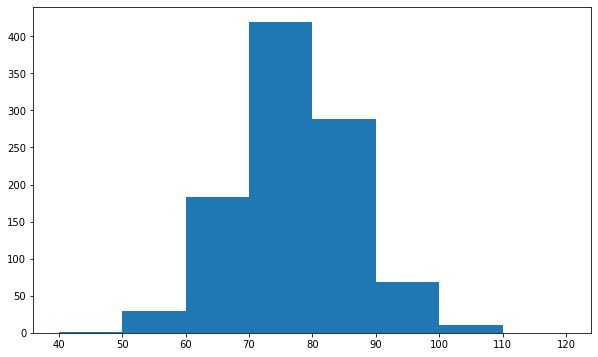

In [381]:
plt.figure(figsize=(10, 6));
plt.hist(Gross_Profit, bins = [40, 50, 60, 70, 80, 90, 100, 110, 120]);
plt.show()

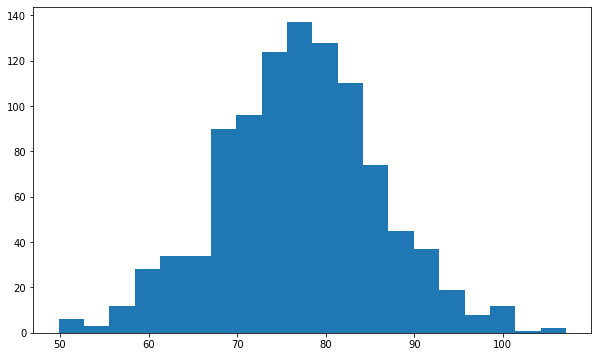

In [382]:
plt.figure(figsize=(10, 6));
plt.hist(Gross_Profit, bins = 20);
plt.show()

# Forcasting Stock Prices

In [383]:
import numpy as np 
import pandas as pd 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt 
from scipy.stats import norm
%matplotlib inline 

In [384]:
ticker = 'CVS'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start ='2010-1-1')['Adj Close']

In [385]:
log_return = np.log(1 + data.pct_change())

In [386]:
log_return.tail()

,CVS
Date,
2022-04-04,-0.010841
2022-04-05,-0.005415
2022-04-06,0.025805
2022-04-07,0.015073
2022-04-08,0.028543


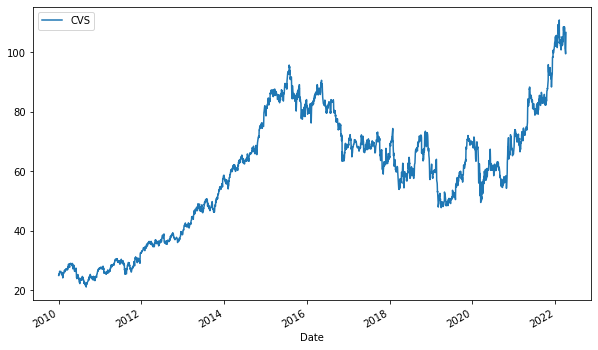

In [387]:
data.plot(figsize=(10, 6));

<AxesSubplot:xlabel='Date'>

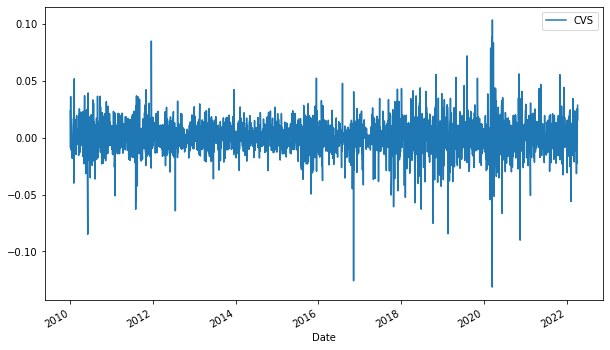

In [388]:
log_return.plot(figsize= (10, 6))

In [389]:
u = log_return.mean()
u

CVS    0.00047
dtype: float64

In [390]:
var = log_return.var()
var

CVS    0.000226
dtype: float64

$$
drift = u - \frac{1}{2} \cdot var
$$

In [391]:
drift = u - (0.5 * var)
drift

CVS    0.000357
dtype: float64

In [392]:
stdev = log_return.std()
stdev

CVS    0.015038
dtype: float64

In [393]:
type(drift)

pandas.core.series.Series

In [394]:
type(stdev)

pandas.core.series.Series

In [395]:
np.array(drift)

array([0.00035668])

In [396]:
drift.values

array([0.00035668])

In [397]:
stdev.values

array([0.01503762])

In [398]:
norm.ppf(0.95)

1.6448536269514722

In [399]:
x = np.random.rand(10,2)
x

array([[0.14425178, 0.43823266],
       [0.86000005, 0.54331547],
       [0.3608487 , 0.96998126],
       [0.68229045, 0.00632256],
       [0.24555514, 0.27406856],
       [0.84680925, 0.35897211],
       [0.00315028, 0.03885929],
       [0.7734474 , 0.73000534],
       [0.25669027, 0.12654196],
       [0.61197126, 0.43112164]])

In [400]:
norm.ppf(x)

array([[-1.06141012, -0.15545159],
       [ 1.08031955,  0.10878999],
       [-0.35619117,  1.88051823],
       [ 0.47411333, -2.4936107 ],
       [-0.68854399, -0.60055396],
       [ 1.02284422, -0.36120765],
       [-2.73171559, -1.76407961],
       [ 0.75024824,  0.61282915],
       [-0.65358295, -1.14289083],
       [ 0.28446053, -0.17351927]])

In [401]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.82059242,  0.76523093],
       [ 0.3353236 ,  1.20160194],
       [ 2.07349278,  2.91708252],
       [-2.4254629 ,  2.22062919],
       [-0.42681518, -0.83182531],
       [ 0.9074268 , -1.41733398],
       [ 0.7432032 , -0.55115112],
       [ 0.29381169,  0.89030111],
       [-0.53054936,  0.29099897],
       [-1.14701846, -1.62628288]])

In [402]:
t_intervals = 1000
iterations = 10 

In [403]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [404]:
daily_returns

array([[0.99597483, 1.03541405, 1.00143404, ..., 0.98792762, 0.97143523,
        1.00213931],
       [1.00611703, 1.00358739, 1.00428962, ..., 1.01048271, 0.9645344 ,
        1.01431245],
       [0.99914093, 1.00928322, 0.99208626, ..., 0.99257213, 0.995103  ,
        1.00003432],
       ...,
       [0.97608309, 1.01310384, 0.98927799, ..., 1.01695058, 1.00870338,
        0.99660375],
       [0.99509099, 0.99609706, 0.99708119, ..., 1.0293225 , 1.01124324,
        1.00254892],
       [0.99136236, 1.00651522, 1.01278658, ..., 1.02273544, 1.00868982,
        1.02287221]])

In [405]:
S0 = data.iloc[-1]
S0

CVS    106.610001
Name: 2022-04-08 00:00:00, dtype: float64

In [406]:
price_list = np.zeros_like(daily_returns)

In [407]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [408]:
price_list[0] = S0
price_list

array([[106.61000061, 106.61000061, 106.61000061, ..., 106.61000061,
        106.61000061, 106.61000061],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [409]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1]* daily_returns[t]

In [410]:
price_list

array([[106.61000061, 106.61000061, 106.61000061, ..., 106.61000061,
        106.61000061, 106.61000061],
       [107.26213725, 106.99245242, 107.06731655, ..., 107.72756231,
        102.82901252, 108.13585143],
       [107.16999199, 107.98568702, 106.22001345, ..., 106.92737648,
        102.32545891, 108.13956237],
       ...,
       [138.21483475,  81.14900841, 110.44231639, ..., 116.30403398,
        258.95637462, 172.26677315],
       [137.53633636,  80.83228862, 110.11995581, ..., 119.71435939,
        261.86788336, 172.70586794],
       [136.3483471 ,  81.35892865, 111.52801331, ..., 122.43611849,
        264.14346822, 176.6560328 ]])

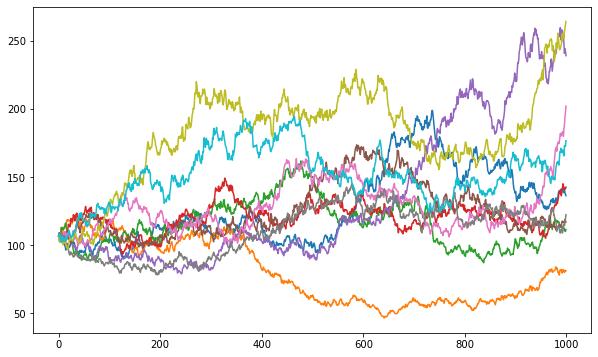

In [411]:
plt.figure(figsize=(10, 6))
plt.plot(price_list);